In [ ]:
%matplotlib inline 
#to include graphs next to the code
#useful libraries
import numpy as np #linear algebra
import math
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualization


file='combined_csv_3dim.csv'
data3 = pd.read_csv(file)


#get the overview of the data


print(data3.describe()) #statistics 

       totalTravelTimeInSec  ...  totalWaitingTime
count          92229.000000  ...      92229.000000
mean          197502.622841  ...     186403.156328
std           382265.843976  ...     387461.940713
min              424.000000  ...          0.000000
25%             9891.000000  ...          0.000000
50%            16091.000000  ...          0.000000
75%            30249.000000  ...       6948.000000
max           999999.000000  ...     999999.000000

[8 rows x 5 columns]


In [ ]:
#investigate deeper the rows with the values of 999999
data3[(data3 == 999999.0).any(axis=1)]
# we have 17048 rows with the unreal values 


,totalTravelTimeInSec,totalPrice,totalNumberOfChanges,totalWalkingDistance,totalWaitingTime,objective,finiteAutomaton,consideredPreferences,finalSolutionUsedLabels,sourceName,targetName
12,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
22,999999.0,999999.0,999999,999999.0,999999,numberofChanges,ptOnly,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
37,999999.0,999999.0,999999,999999.0,999999,numberofChanges,noFlights,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
41,999999.0,999999.0,999999,999999.0,999999,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[blablacar],Hamburg,Würzburg
51,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
92218,999999.0,999999.0,999999,999999.0,999999,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92223,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92226,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
92227,999999.0,999999.0,999999,999999.0,999999,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],Würzburg,Oberhausen


In [ ]:
for c in data3:
    print(data3[c].unique())
    print(data3[c].nunique())

[14400. 18300. 21643. ... 16522. 22080. 27198.]
2676
[159.5729972  106.66969339  26.         ...  85.79963198 108.44789322
 109.45803673]
3654
[     0 999999      1      2      3      4      7      5]
8
[0.00000000e+00 9.99999000e+05 6.04486783e-02 3.05347513e-01
 4.15018720e-01 4.84844618e-01 6.02814987e-01 8.38771887e-01
 4.50467200e-01 1.18120831e-01 3.54077731e-01 2.14510299e-01
 2.88175428e-01 4.66333439e-01 5.40945201e-01 8.40202310e-02
 7.16546025e-02 5.14118875e-01 3.53583043e-01 3.65948671e-01
 4.07756666e-01 1.25828225e-01 4.14100041e-01 3.40389879e-01
 4.20194123e-01 1.13207893e-01 3.79003625e-01 3.13785411e-01
 3.68008128e-01 1.76304340e-01 1.41157676e-01 1.91048642e-01
 2.73794816e-01 2.00978767e-01 4.88520914e-01 3.59570231e-01
 2.99749140e-01 1.99538620e-01 3.02761736e-01 2.83967859e-01
 4.71050779e-01 4.32386280e-01 3.78163562e-01 4.54792472e-01
 2.62531420e-01 2.42940645e-01 2.54481612e-01 2.79636401e-01
 2.85730483e-01 2.62914567e-01 1.85721160e-01 1.73190272e-01
 4.7

In [ ]:
#try to search for some pattern within the categorical columns there
# create a new one smaller dataset full of values

search= data3.query('totalPrice in [999999.0]')
search

,totalTravelTimeInSec,totalPrice,totalNumberOfChanges,totalWalkingDistance,totalWaitingTime,objective,finiteAutomaton,consideredPreferences,finalSolutionUsedLabels,sourceName,targetName
12,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
22,999999.0,999999.0,999999,999999.0,999999,numberofChanges,ptOnly,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
37,999999.0,999999.0,999999,999999.0,999999,numberofChanges,noFlights,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
41,999999.0,999999.0,999999,999999.0,999999,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[blablacar],Hamburg,Würzburg
51,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
92218,999999.0,999999.0,999999,999999.0,999999,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92223,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92226,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
92227,999999.0,999999.0,999999,999999.0,999999,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],Würzburg,Oberhausen


In [ ]:
#no special pattern,typial for all objectives,mode choices,all combinations of labels and preferences

for col in search:
    print(search[col].unique())
    print(search[col].nunique())

[999999.]
1
[999999.]
1
[999999]
1
[999999.]
1
[999999]
1
['numberofChanges' 'travelTime' 'walkingDistance' 'waitingTime' 'price']
5
['all' 'ptOnly' 'noFlights']
3
['[travelTime, price, numberofChanges]'
 '[travelTime, price, numberofChanges, walkingDistance]'
 '[travelTime, price, numberofChanges, walkingDistance, waitingTime]']
3
['[db_fv]' '[blablacar]' '[flixbus, db_fv]' '[db_fv, flixbus]' '[flixbus]'
 '[db_fv, blablacar]' '[flixbus, blablacar]'
 '[db_fv, flixbus, db_fv, flixbus]' '[db_fv, flixbus, db_fv]'
 '[blablacar, db_fv]' '[db_fv, blablacar, db_fv]'
 '[db_fv, blablacar, flixbus]' '[car]'
 '[db_fv, blablacar, flixbus, db_fv]' '[blablacar, flixbus, db_fv]'
 '[blablacar, db_fv, flixbus, db_fv]' '[blablacar, flixbus]'
 '[blablacar, db_fv, flixbus]' '[flixbus, blablacar, flixbus]'
 '[flixbus, db_fv, flixbus]' '[flixbus, db_fv, blablacar]'
 '[db_fv, flixbus, blablacar]' '[flixbus, blablacar, db_fv]'
 '[flixbus, flight, db_fv]' '[db_fv, flixbus, db_fv, flixbus, db_fv]'
 '[db_fv, bla

In [ ]:
#drop these rows
data3.drop(data3[data3.totalTravelTimeInSec == 999999.0].index, inplace=True)
data3

,totalTravelTimeInSec,totalPrice,totalNumberOfChanges,totalWalkingDistance,totalWaitingTime,objective,finiteAutomaton,consideredPreferences,finalSolutionUsedLabels,sourceName,targetName
0,14400.0,159.572997,0,0.000000,0,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,18300.0,106.669693,0,0.000000,0,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,21643.0,26.000000,0,0.000000,0,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,21643.0,26.000000,0,0.000000,0,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,18300.0,106.669693,0,0.000000,0,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
92220,13200.0,103.627142,1,0.000000,180,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
92221,16342.0,22.466778,1,0.176952,916,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92222,16522.0,21.850084,1,0.176952,1096,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92224,13020.0,109.023555,1,0.000000,240,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
# saving the newest dataframe

import os

working_directory = os.getcwd()
print (working_directory)

/content


In [ ]:
#get the file without 999999 values

import csv
import os.path

userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'data.csv')
open(csvfile, "r")

path = working_directory + '/Desktop/combined_csv_3dim.csv'
data3 = pd.read_csv(path)
data3.head()

import csv


userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'newcombined_csv_3dim.csv')


data3.to_csv(csvfile, encoding='utf-8',index=False)

FileNotFoundError: ignored

In [ ]:
pip install datacompy

  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=f5d3664254db15c07b938bc0e61410d9e681448b8ae08ffa7d2c4eaf6b7bfabc
  Stored in directory: /root/.cache/pip/wheels/73/2b/f6/26e9f84153c25050fe7c09e88f8e32a6be3c7034a38c418319
Successfully built ordered-set


In [ ]:
from io import StringIO
import datacompy

In [ ]:
#used 2 files- 2 dim and reduced by 999999 values 3 dim dataset
df1 = pd.read_csv('combined_csv_2dim.csv')
df2 = pd.read_csv('newcombined_csv_3dim.csv')

In [ ]:
# to obtain the insights about the similarities in 2 datasets per rows and columns
#join with the list of all columns to compare the combinations
# common rows are 45857
compare = datacompy.Compare(
df1,
df2,
join_columns= ['totalTravelTimeInSec',	'totalPrice',	'totalNumberOfChanges',	'totalWalkingDistance',	'totalWaitingTime',	'objective',	'finiteAutomaton',	'consideredPreferences',	'finalSolutionUsedLabels','sourceName', 'targetName'],
#['totalTravelTimeInSec', 'totalPrice'],
abs_tol=0,
rel_tol=0,
df1_name='2dimensions',
df2_name='3dimensions')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

     DataFrame  Columns   Rows
0  2dimensions       11  63069
1  3dimensions       11  75181

Column Summary
--------------

Number of columns in common: 11
Number of columns in 2dimensions but not in 3dimensions: 0
Number of columns in 3dimensions but not in 2dimensions: 0

Row Summary
-----------

Matched on: totaltraveltimeinsec, totalprice, totalnumberofchanges, totalwalkingdistance, totalwaitingtime, objective, finiteautomaton, consideredpreferences, finalsolutionusedlabels, sourcename, targetname
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 45,857
Number of rows in 2dimensions but not in 3dimensions: 17,212
Number of rows in 3dimensions but not in 2dimensions: 29,324

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 45,857

Column Comparison
-----------------

Number of columns compared with

In [ ]:
# transform seconds to hours for plotting
def transform_values(d):
  d['totaltraveltimeinsec'] = d['totaltraveltimeinsec'].div(360).round(2)
  d['totalwaitingtime'] = d['totalwaitingtime'].div(360).round(2)

  return d

df1 = transform_values(df1)
df1

df2 = transform_values(df2)
df2

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,40.00,159.572997,0,0.000000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,50.83,106.669693,0,0.000000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,60.12,26.000000,0,0.000000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,60.12,26.000000,0,0.000000,0.00,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,50.83,106.669693,0,0.000000,0.00,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.627142,1,0.000000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,45.39,22.466778,1,0.176952,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,45.89,21.850084,1,0.176952,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,36.17,109.023555,1,0.000000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
data_3 = df2.iloc[:10]
  
# printing first 10 of the column
print(data_3)

   totaltraveltimeinsec  totalprice  ...  sourcename  targetname
0                 40.00  159.572997  ...     Hamburg    Würzburg
1                 50.83  106.669693  ...     Hamburg    Würzburg
2                 60.12   26.000000  ...     Hamburg    Würzburg
3                 60.12   26.000000  ...     Hamburg    Würzburg
4                 50.83  106.669693  ...     Hamburg    Würzburg
5                 40.17  159.572997  ...     Hamburg    Würzburg
6                 40.00  159.572997  ...     Hamburg    Würzburg
7                 59.67  152.430459  ...     Hamburg    Würzburg
8                 50.83  106.669693  ...     Hamburg    Würzburg
9                 60.12   26.000000  ...     Hamburg    Würzburg

[10 rows x 11 columns]


In [ ]:
#round price to 2 digits
def round(d):
  d=d.round({'totalwalkingdistance': 3, 'totalprice': 2})
  return d

df1 = round(df1)
df1

df2 = round(df2)
df2

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,40.00,159.57,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,50.83,106.67,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,60.12,26.00,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,60.12,26.00,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,50.83,106.67,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


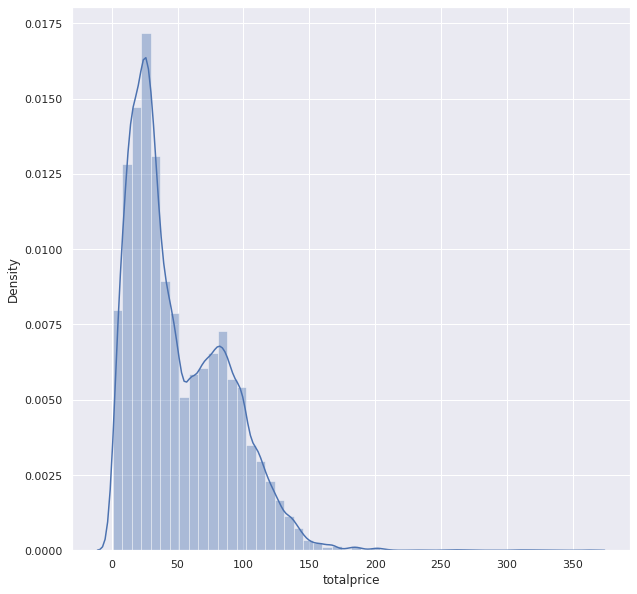

In [ ]:
#have a look at the total price distribution
#the data is skewed
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df2['totalprice'], color='b')

#the price distribution is not normally distributed
#can conclude that the majority of prices has a value between 14 and 35 euros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


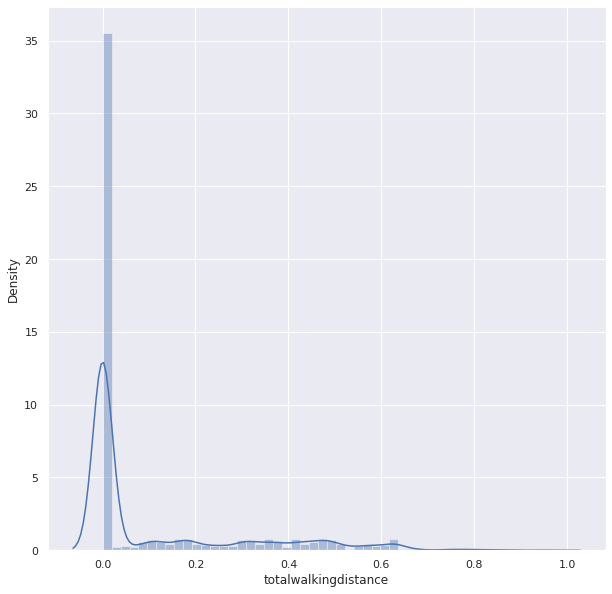

In [ ]:
#have a look at the total walking distance distribution
#the data is skewed
# a lot of 0 values
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df1['totalwalkingdistance'], color='b')



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


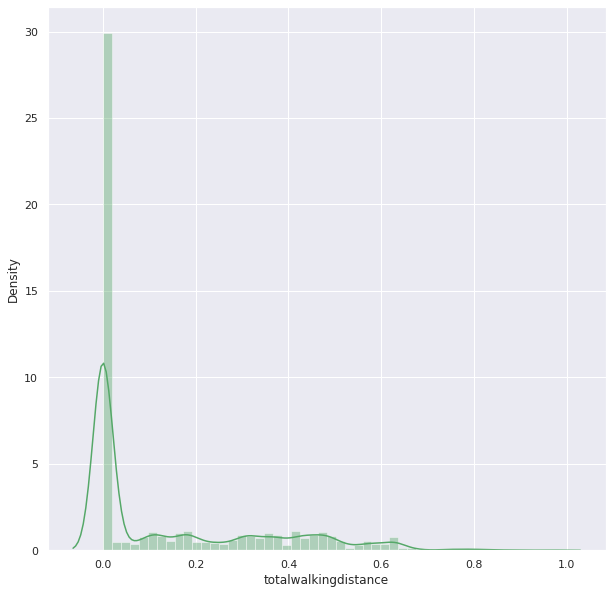

In [ ]:
#have a look at the total walking distance distribution
#the data is skewed
# a lot of 0 values
# same pattern for the 3 dim dataset
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df2['totalwalkingdistance'], color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


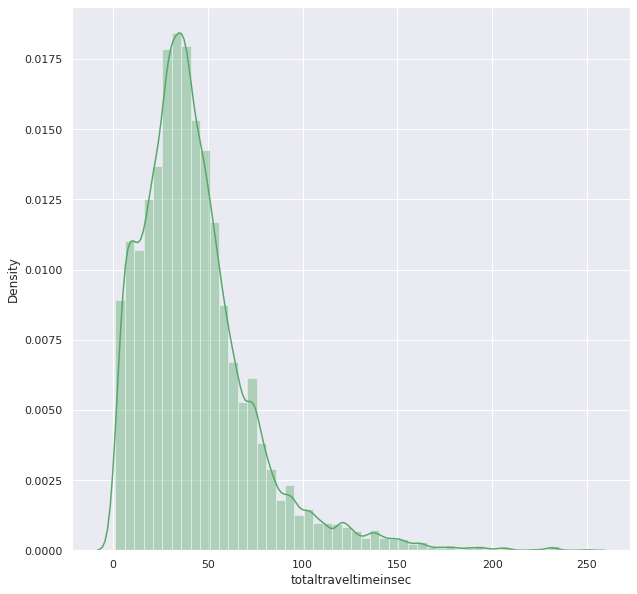

In [ ]:
#have a look at the total travel time distribution
#skewed right
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df2['totaltraveltimeinsec'], color='g')


#can conclude that the dense area is 25-35 hours

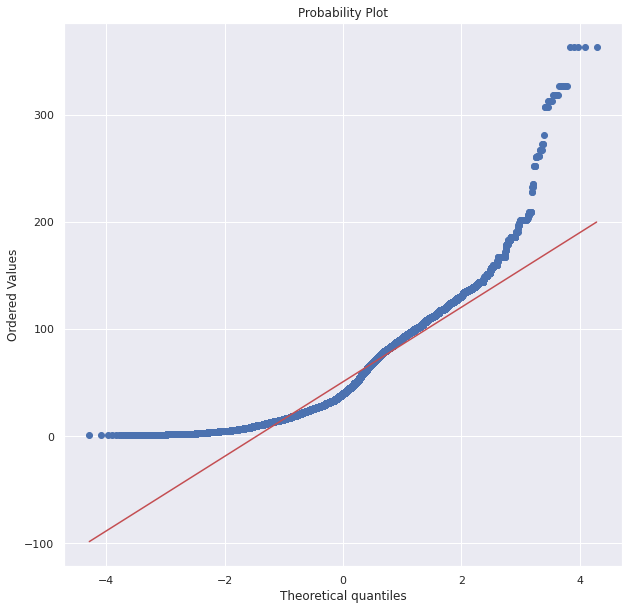

In [ ]:
# data is not normally distributed, we cant perform t-test, we shoud use Mann-Whitney U test which doesnt assume any specific distribution

import numpy as np 
import pylab 
import scipy.stats as stats
plt.figure(figsize=(10,10))
plt.title('Distribution of prices ',fontsize=15)
measurements = df2['totalprice']  
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

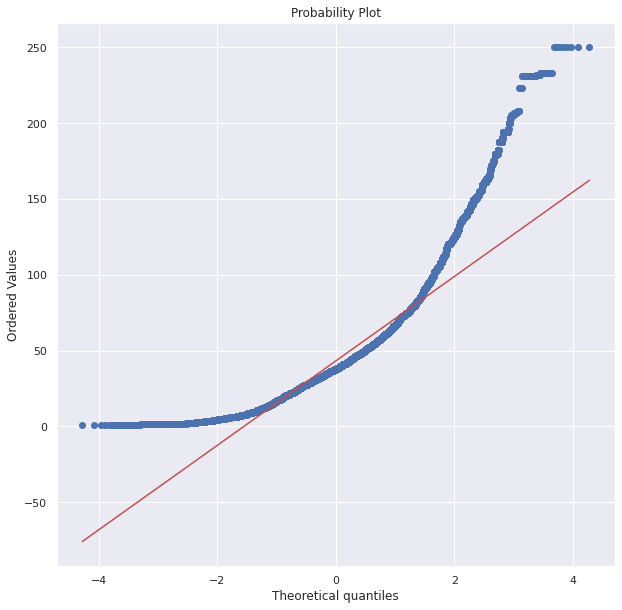

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribution of travel time ',fontsize=15)
measurements = df2['totaltraveltimeinsec']  
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [ ]:
# get sample from df2 that df2=df1
df2s= df2['totalwalkingdistance'].sample(n=63000, random_state=1)
df2s

46932    0.000
74285    0.387
64944    0.000
25834    0.000
21381    0.000
         ...  
16329    0.000
25022    0.000
56564    0.178
65532    0.000
4215     0.303
Name: totalwalkingdistance, Length: 63000, dtype: float64

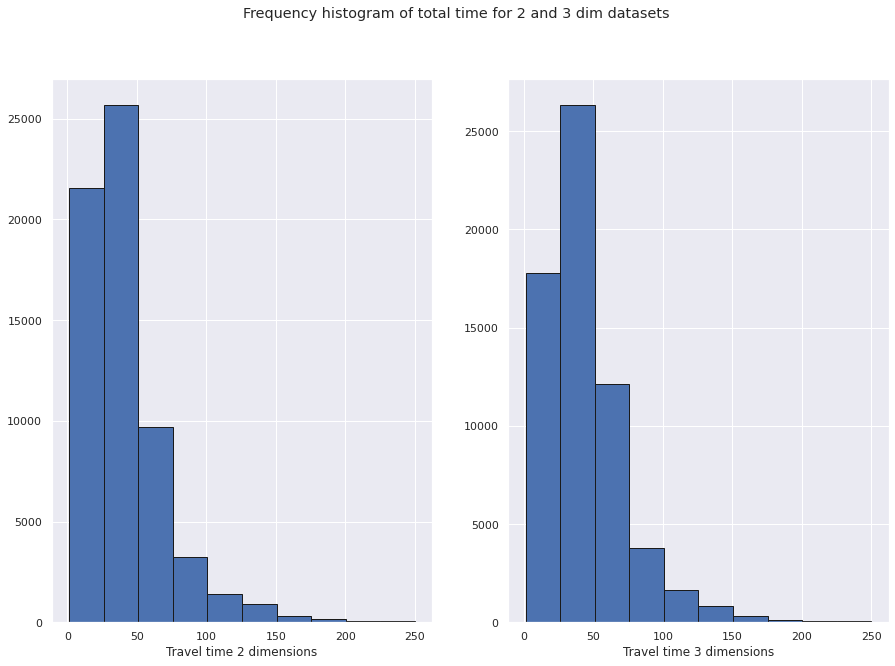

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Frequency histogram of total time for 2 and 3 dim datasets')
ax1.hist(df1['totaltraveltimeinsec'], bins=10, histtype='bar', ec='k') 
ax2.hist(df2['totaltraveltimeinsec'].sample(n=63069, random_state=1), bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Travel time 2 dimensions")
ax2.set_xlabel("Travel time 3 dimensions")
plt.show()

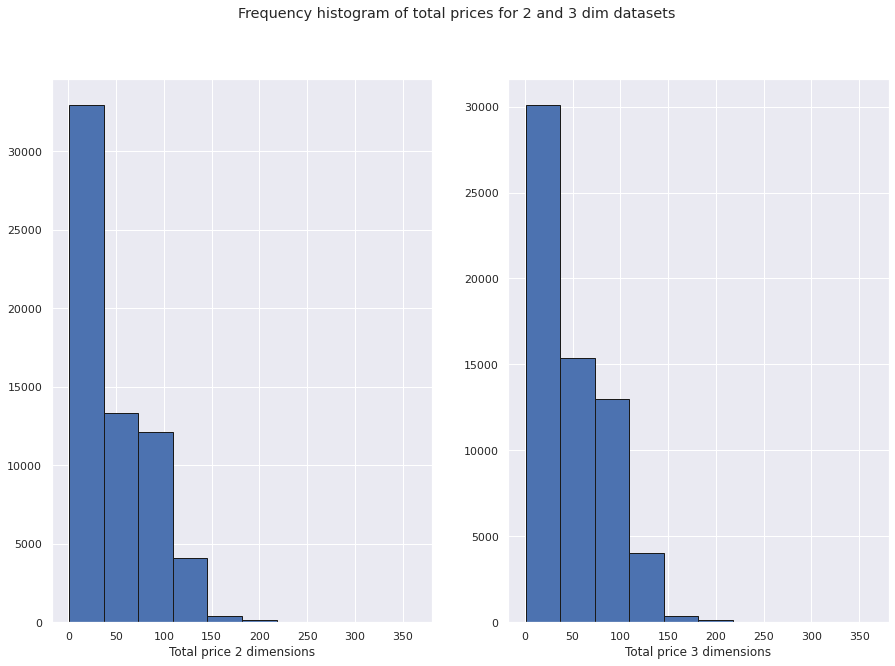

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Frequency histogram of total prices for 2 and 3 dim datasets')
ax1.hist(df1['totalprice'], bins=10, histtype='bar', ec='k') 
ax2.hist(df2['totalprice'].sample(n=63069, random_state=1), bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Total price 2 dimensions")
ax2.set_xlabel("Total price 3 dimensions")
plt.show()

In [ ]:
import scipy.stats as stats
#As the p value obtained from the Shapiro-Wilk test is significant (p < 0.05)
# we sum up again that the data is not normally distributed
w, pvalue = stats.shapiro(df1['totalprice'].sample(n=200, random_state=1))
w, pvalue


(0.899763286113739, 2.427241740932118e-10)

In [ ]:
w, pvalue = stats.shapiro(df2['totalprice'].sample(n=200, random_state=1))
w, pvalue


(0.9250867962837219, 1.3982589308625393e-08)

In [ ]:
#significance level =0.05 ,indicates a 5% risk of concluding that a difference exists when there is no actual difference
#as the p value obtained from the Mann-Whitney U test is not significant (p > 0.05), we conclude that the total price of the data set 1 is not significantly greater than the total price from data set 2

stats.mannwhitneyu(x=df1['totalprice'], y=df2['totalprice'].sample(n=63069, random_state=1), alternative = 'greater')

MannwhitneyuResult(statistic=1884880760.5, pvalue=1.0)

In [ ]:
#significance level =0.05 ,indicates a 5% risk of concluding that a difference exists when there is no actual difference
#as the p value obtained from the Mann-Whitney U test is not significant (p > 0.05), we conclude that the total travel time of the data set 1 is not significantly greater than the total travel time distribution from data set 2
# if sample size is too big, p value could not be exact enough
stats.mannwhitneyu(x=df1['totaltraveltimeinsec'], y=df2['totaltraveltimeinsec'].sample(n=63069, random_state=1), alternative = 'greater')

MannwhitneyuResult(statistic=1823528570.0, pvalue=1.0)

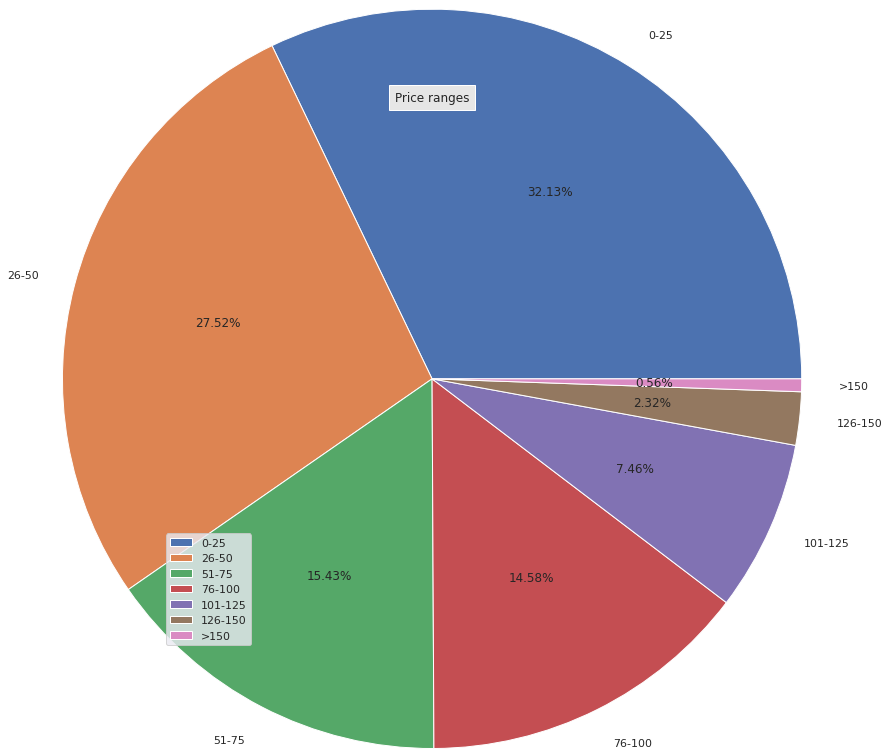

50.09193812266397

In [ ]:
#briefly investigate other plots (differences for 3 dim) before the final merging

#price binning for 3 dim
data_price3 = df2[:] #slice for every element
data_price3["totalprice"] = data_price3["totalprice"].astype(int) #specify the column and dtype we need
bins = [0,25,50,75,100,125,150,200] #create a list of bins
labels = ['0-25','26-50','51-75','76-100','101-125', '126-150', '>150'] #create the list of labels
data_price3['totalprice_cat'] = pd.cut(data_price3["totalprice"], bins=bins, labels=labels) #bin values into discrete intervals
data_price3.head()
plt.figure(figsize=(10,10)) 

#count and enter percentages inside the shape
plt.pie(data_price3['totalprice_cat'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.7)#parametres
plt.legend(loc="lower left") #location of the figure
plt.title("Price ranges", bbox={'facecolor':'0.9', 'pad':6}, loc = "center")#play with the title
plt.show()


#on average the price would be 50 euros
data_price3["totalprice"].mean()

#the most common range for price in dataset3 is also below 25 euros

Text(0.5, 1.0, 'Correlation between price and travel time')

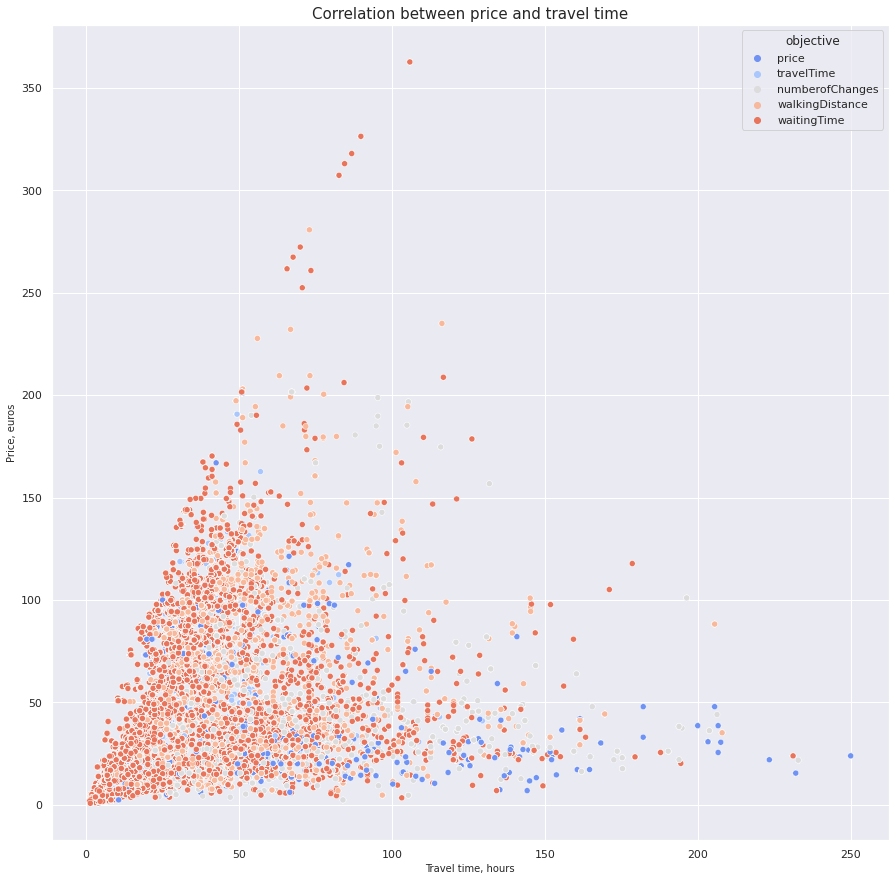

In [ ]:
#absolutely the same pattern, final solutions are different (new unique combinations based on considered preferences)
#scatter plot price per travel time in general, hard to interpret 
# further checks per source and target, separate groups via clustering , per transport mode would be needed
import matplotlib as mpl
plt.figure(figsize=(15, 15))
sns.scatterplot(
    data=df4,
    x="totaltraveltimeinsec", y="totalprice",hue="objective",
     palette= "coolwarm",
)
plt.xlabel("Travel time, hours", size = 10)
plt.ylabel("Price, euros", size = 10)
plt.title("Correlation between price and travel time", size = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


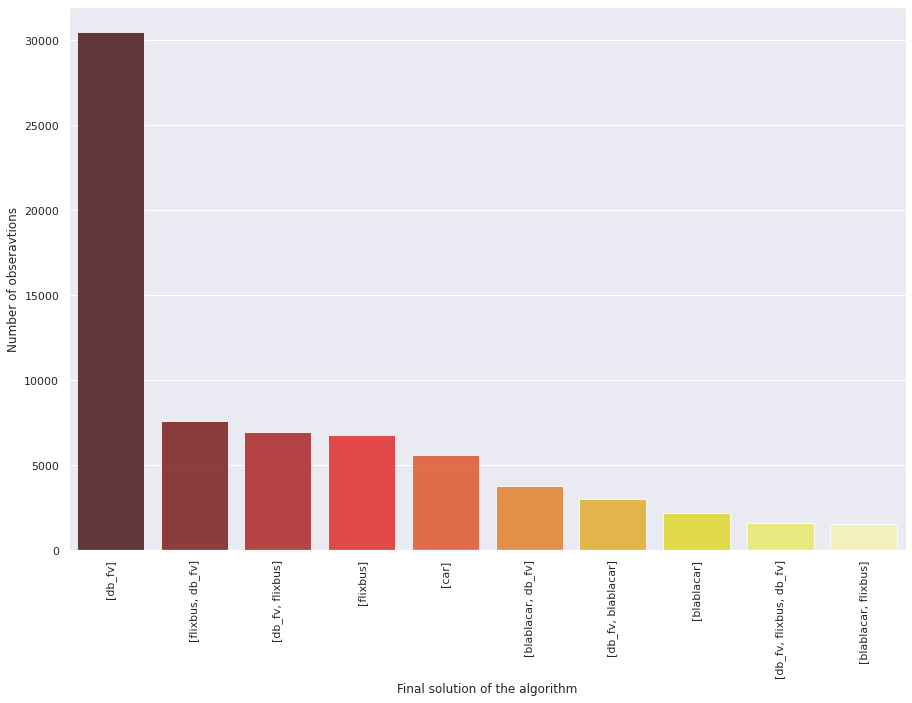

In [ ]:
# Plot Top 10 combinations based on number of observations
# the lead combination is the same as in 2dim, the second one proposed option is different in comparison to 2dim dataset
# the most common one (suitable for many routes)- train
cnt_srs = df2['finalsolutionusedlabels'].value_counts().nlargest(10)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Final solution of the algorithm', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


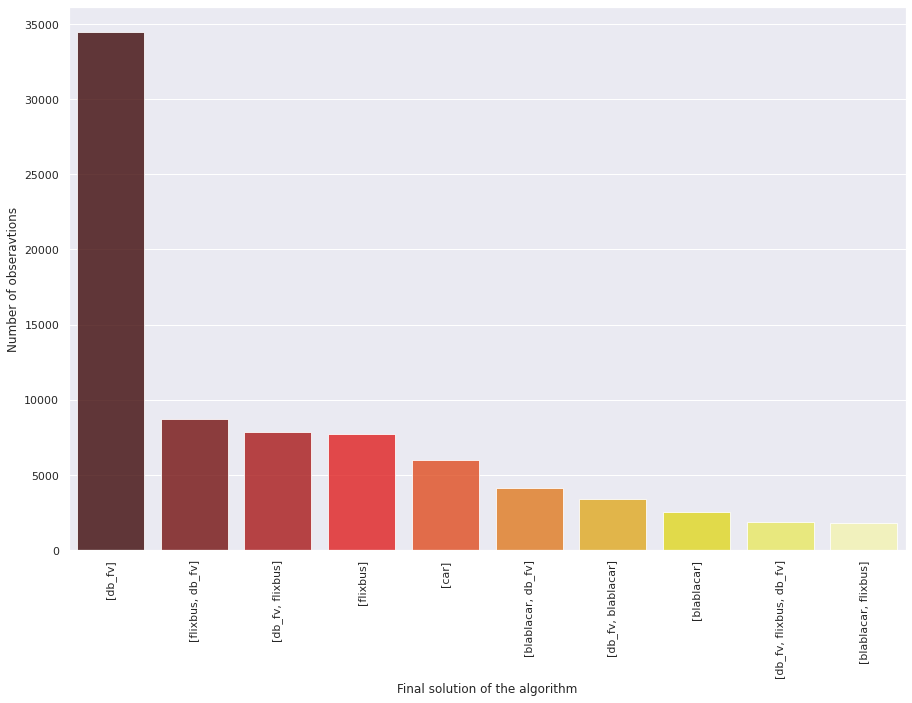

In [ ]:
# Plot Top 10 combinations based on number of observations for combined
# train
cnt_srs = df4['finalsolutionusedlabels'].value_counts().nlargest(10)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Final solution of the algorithm', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Distribution of prices per number of changes ')

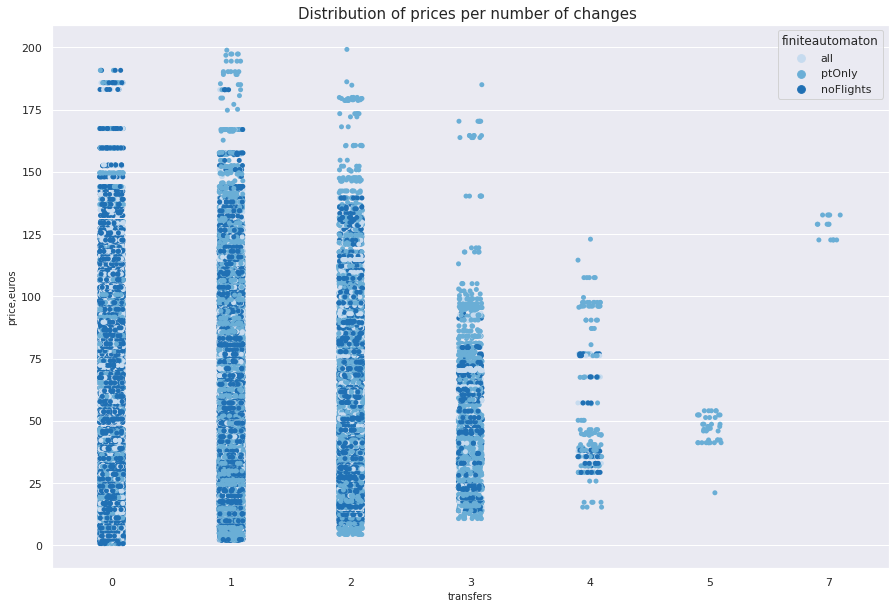

In [ ]:
#investigate deeper in the transfer distribution when the price is less than 200 euros
#for 3 dim dataset

plt.figure(figsize=(15, 10))
sns.stripplot(data=df2,x=df2.totalnumberofchanges[df2['totalprice']<200]#set an interval
              ,y='totalprice', hue="finiteautomaton",palette='Blues') #configure the axis
plt.xlabel("transfers", size = 10)
plt.ylabel("price,euros", size = 10)
plt.title('Distribution of prices per number of changes ',fontsize=15)

#found out that the price is slightly higher having 1 transfer than 0 (includes 0 and null),2 and 3, but all of them are higher than having  4,5 and 7
# for 0 transfer the mode of noFlights is dominative one, especially when the price is high, for 1-7 transfers higher price relates to public transport choice mostly

In [ ]:
#get the combinations for 2 dim
uniqueValues = df1['finalsolutionusedlabels'].unique()
uniqueValues

array(['[flixbus]', '[db_fv]', '[car]', '[blablacar, db_fv]',
       '[flixbus, db_fv]', '[db_fv, flixbus]',
       '[db_fv, flixbus, blablacar]', '[db_fv, flixbus, db_fv]',
       '[db_fv, blablacar]', '[db_fv, blablacar, db_fv]',
       '[flixbus, blablacar, db_fv]', '[blablacar]',
       '[db_fv, blablacar, flixbus]',
       '[db_fv, blablacar, flixbus, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus]', '[blablacar, flixbus]',
       '[blablacar, db_fv, flixbus]', '[blablacar, flixbus, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus, db_fv]',
       '[flixbus, db_fv, flixbus, db_fv]', '[flixbus, flight, db_fv]',
       '[flixbus, blablacar]', '[flixbus, db_fv, flixbus]',
       '[flixbus, blablacar, flixbus]',
       '[flixbus, flight, db_fv, flixbus]',
       '[db_fv, flixbus, blablacar, flixbus]',
       '[flixbus, flight, flixbus]',
       '[flixbus, blablacar, db_fv, flixbus]',
       '[flixbus, db_fv, blablacar]',
       '[flixbus, blablacar, flixbus, db_fv]',
       '[db_fv,

In [ ]:
#for 3 dim
uniqueValues1 = df2['finalsolutionusedlabels'].unique()
uniqueValues1

array(['[db_fv]', '[blablacar]', '[car]', '[flixbus, db_fv]',
       '[db_fv, flixbus]', '[flixbus]', '[db_fv, blablacar]',
       '[flixbus, blablacar]', '[db_fv, flixbus, db_fv, flixbus]',
       '[db_fv, flixbus, db_fv]', '[blablacar, db_fv]',
       '[db_fv, blablacar, db_fv]', '[db_fv, blablacar, flixbus]',
       '[db_fv, blablacar, flixbus, db_fv]',
       '[blablacar, db_fv, flixbus, db_fv]',
       '[blablacar, flixbus, db_fv]', '[blablacar, flixbus]',
       '[blablacar, db_fv, flixbus]', '[flixbus, blablacar, flixbus]',
       '[flixbus, db_fv, flixbus]', '[flixbus, db_fv, blablacar]',
       '[db_fv, flixbus, blablacar]', '[flixbus, blablacar, db_fv]',
       '[flixbus, flight, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus, db_fv]',
       '[flixbus, db_fv, flixbus, db_fv]',
       '[db_fv, blablacar, db_fv, flixbus]'], dtype=object)

In [ ]:
# we have 6 additional combinations in 2 dim than in 3 dim
np.setdiff1d(uniqueValues,uniqueValues1)

array(['[db_fv, flight, flixbus, db_fv]',
       '[db_fv, flixbus, blablacar, flixbus]',
       '[flixbus, blablacar, db_fv, flixbus]',
       '[flixbus, blablacar, flixbus, db_fv]',
       '[flixbus, flight, db_fv, flixbus]', '[flixbus, flight, flixbus]'],
      dtype=object)

In [ ]:
#we do not have any new unique solutions themselves in 3 dim versus 2 dim
np.setdiff1d(uniqueValues1,uniqueValues)

array([], dtype=object)

In [ ]:
#combine 2 datasets
frames = [df1, df2]
df3 = pd.concat(frames)
df3

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
#for reducing the duplicates
df4=df3.copy()
df4

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
...,...,...,...,...,...,...,...,...,...,...,...
138245,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
138246,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
138247,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
138248,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
#determine the duplicated rows- we have 53097 duplicates
df4.duplicated(subset=['totaltraveltimeinsec',	'totalprice',	'totalnumberofchanges',	'totalwalkingdistance',	'totalwaitingtime',	'objective',	'finiteautomaton',	'consideredpreferences',	'finalsolutionusedlabels','sourcename', 'targetname']).sum()

53097

In [ ]:
#again check the sum without specifing the column
df4.duplicated().sum()

53097

In [ ]:
# first line will be identified as the true line, other lines would be the duplicates, to keep the first distinct value
df4.loc[df4.duplicated(keep='first'), :]

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
55347,14.67,18.59,2,0.000,0.00,travelTime,ptOnly,"[travelTime, price, numberofChanges]",[db_fv],Oberhausen,Hagen
55369,14.67,18.59,2,0.000,0.00,travelTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Oberhausen,Hagen
63069,40.00,159.57,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
63070,50.83,106.67,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
63071,60.12,26.00,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
138245,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
138246,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
138247,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
138248,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
#the duplicated were removed
df4.drop_duplicates(keep='first', inplace=True)

In [ ]:
#new appropriate index
df4.reset_index(inplace=True)

In [ ]:
#new dataset has 85153 rows
df4

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
...,...,...,...,...,...,...,...,...,...,...,...,...
85148,138218,51.67,91.20,1,0.000,6.83,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
85149,138219,61.33,86.04,1,0.000,15.33,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
85150,138235,45.39,22.47,1,0.177,2.54,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
85151,138242,45.39,22.47,1,0.177,2.54,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen


In [ ]:
#check what combinations we have
nnn = df4['consideredpreferences'].unique()
nnn

array(['[travelTime, price]', '[travelTime, price, numberofChanges]',
       '[travelTime, price, numberofChanges, walkingDistance]',
       '[travelTime, price, numberofChanges, walkingDistance, waitingTime]'],
      dtype=object)

In [ ]:
#download the new file for further use
from google.colab import files
df5.to_csv('withcolumns.csv') 
files.download('withcolumns.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'The top 20 most proposed labels versus mean price')

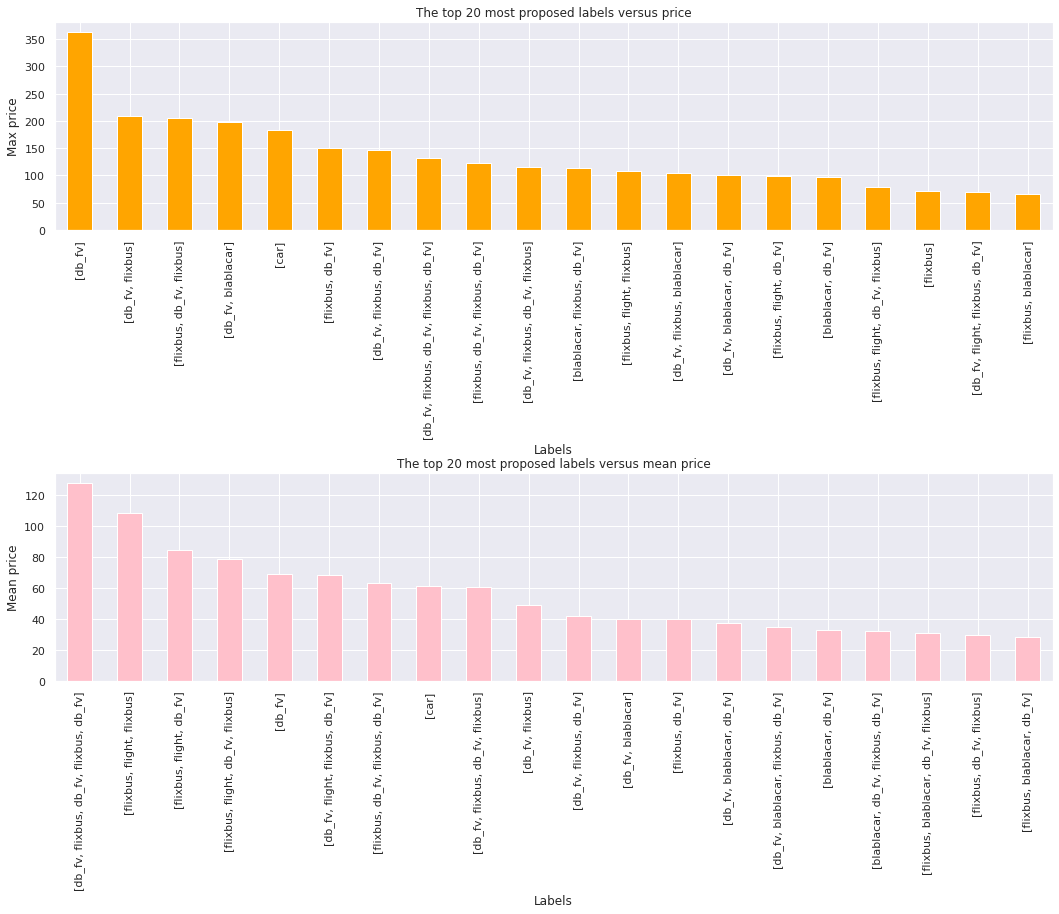

In [ ]:
#display the top twenty labels by max price for a common dataset
most_popular_labels=df4.groupby("finalsolutionusedlabels")["totalprice"].agg("max").sort_values(ascending=False).head(20)
most_popular_labels

fig, axes = plt.subplots(2,1,figsize=(15,10))

#visually checked that the top 3 popular labels are train, train+bus, bus+train+bus
plt.subplot(211)
most_popular_labels.plot(kind='bar',color='orange')#set up inner parametres
plt.xlabel("Labels", size = 12)
plt.ylabel("Max price", size =12)
plt.title("The top 20 most proposed labels versus price", size = 12)

plt.tight_layout() #space
#the ranking of labels have changed when using mean price
#the top 3 became train+bus+train+bus+train, bus+flight+bus, bus+flight+train
plt.subplot(212)
mean_modes = df4.groupby("finalsolutionusedlabels")["totalprice"].agg("mean").sort_values(ascending=False).head(20) #group by aggregated mean in descending order
mean_modes.sort_values(ascending=False).plot(kind = "bar",color='pink') #sort the values in descending order
plt.xlabel("Labels", size = 12)
plt.ylabel("Mean price", size = 12)
plt.title("The top 20 most proposed labels versus mean price", size = 12)

Text(0.5, 1.0, 'The top 20 most proposed labels versus min travel time in hours')

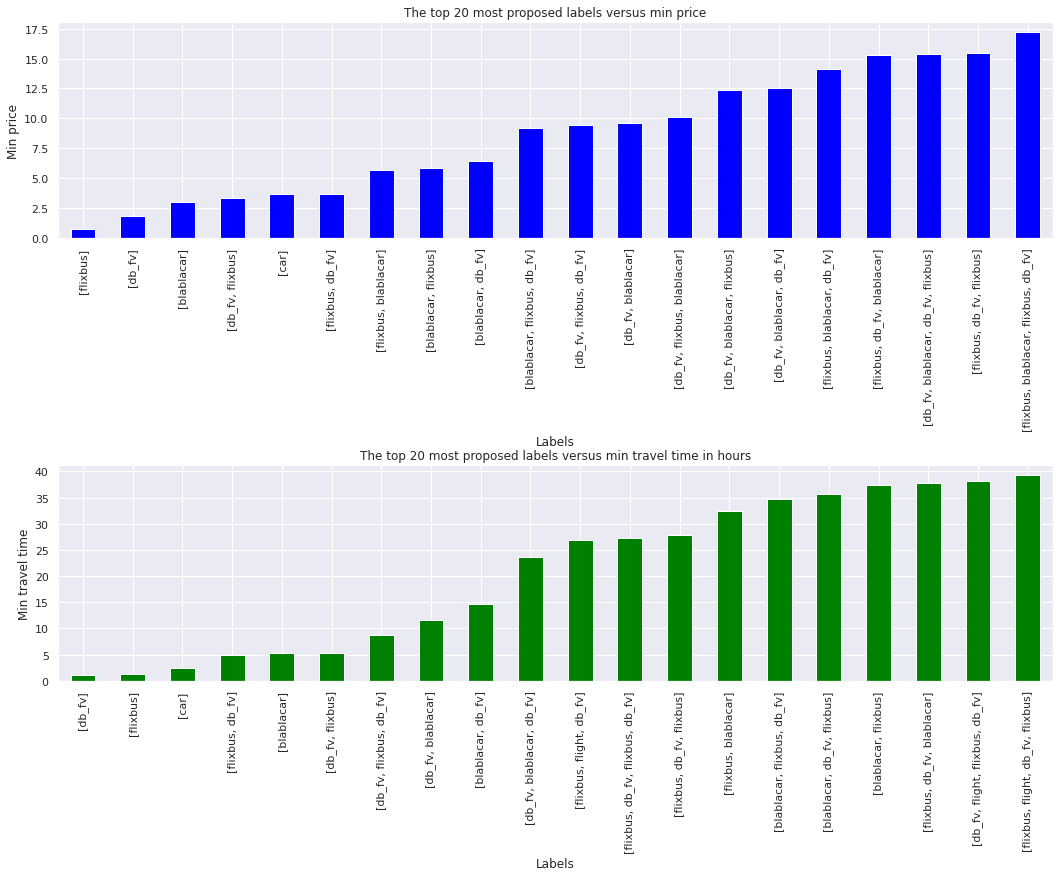

In [ ]:
#display the top twenty labels by min price and travel time
most_popular_labels=df4.groupby("finalsolutionusedlabels")["totalprice"].agg("min").sort_values(ascending=True).head(20)
most_popular_labels

fig, axes = plt.subplots(2,1,figsize=(15,10))

#visually checked that the cheapest one is flixbus less than 1,25 euro
plt.subplot(211)
most_popular_labels.plot(kind='bar',color='blue')#set up inner parametres
plt.xlabel("Labels", size = 12)
plt.ylabel("Min price", size =12)
plt.title("The top 20 most proposed labels versus min price", size = 12)
plt.tight_layout() #space

most_popular_label=df4.groupby("finalsolutionusedlabels")["totaltraveltimeinsec"].agg("min").sort_values(ascending=True).head(20)
most_popular_label

plt.subplot(212)
most_popular_label.plot(kind='bar',color='green')#set up inner parametres
plt.xlabel("Labels", size = 12)
plt.ylabel("Min travel time", size =12)
plt.title("The top 20 most proposed labels versus min travel time in hours", size = 12)



Text(0.5, 1.0, 'The top 20 most proposed labels versus mean travel time in hours')

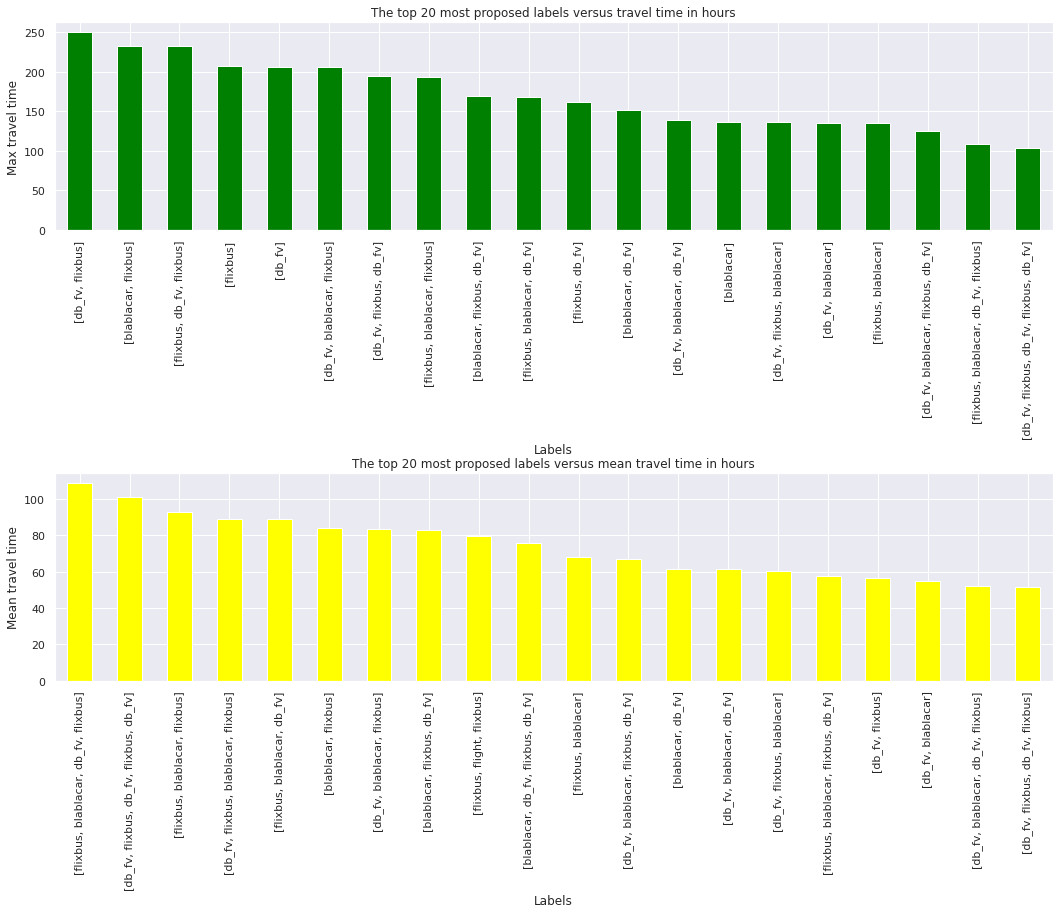

In [ ]:
#display the top twenty labels by max travel time for a common dataset
most_popular_labels=df4.groupby("finalsolutionusedlabels")["totaltraveltimeinsec"].agg("max").sort_values(ascending=False).head(20)
most_popular_labels

fig, axes = plt.subplots(2,1,figsize=(15,10))

#visually checked that the top 3 popular labels are train, train+bus, bus+train+bus
plt.subplot(211)
most_popular_labels.plot(kind='bar',color='green')#set up inner parametres
plt.xlabel("Labels", size = 12)
plt.ylabel("Max travel time", size =12)
plt.title("The top 20 most proposed labels versus travel time in hours", size = 12)

plt.tight_layout() #space
#the ranking of labels have changed when using mean price
#the top 3 became train+bus+train+bus+train, bus+flight+bus, bus+flight+train
plt.subplot(212)
mean_modes = df4.groupby("finalsolutionusedlabels")["totaltraveltimeinsec"].agg("mean").sort_values(ascending=False).head(20) #group by aggregated mean in descending order
mean_modes.sort_values(ascending=False).plot(kind = "bar",color='yellow') #sort the values in descending order
plt.xlabel("Labels", size = 12)
plt.ylabel("Mean travel time", size = 12)
plt.title("The top 20 most proposed labels versus mean travel time in hours", size = 12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


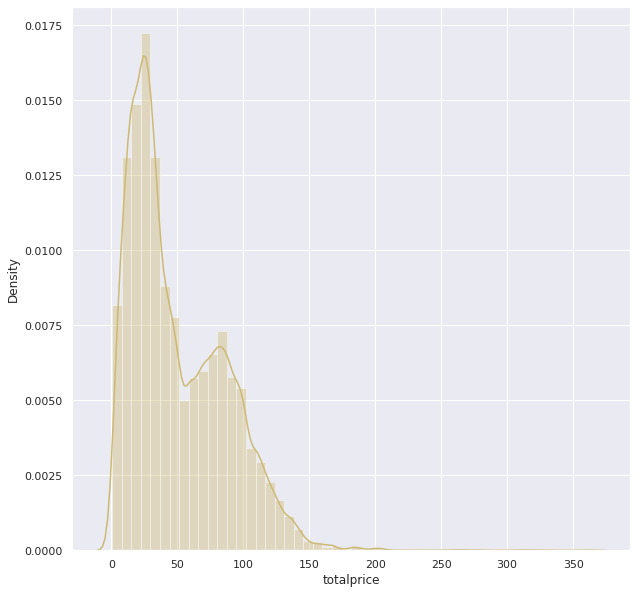

In [ ]:
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df4['totalprice'], color='y')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


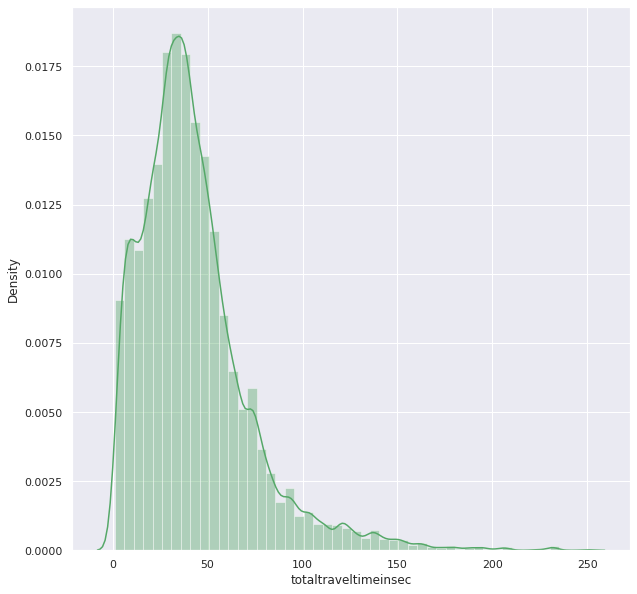

In [ ]:
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df4['totaltraveltimeinsec'], color='g')


In [ ]:
#check combinations via transport types
# will use it for clusters
#returns nothing now
def process_transport_types(df4):
  transport_types = ['blablacar', 'db_fv', 'flixbus', 'car', 'flight']
  for t in transport_types:
    # create new dataframe
    df = pd.DataFrame()
    for row in range(0, len(df4)):
      if t in df3['finalsolutionusedlabels']:
        df.append(row)
    
    return df

# plot prices per travel times
  plt.figure(figsize=(10, 10))
  sns.scatterplot(
      data=df3,
      x="totaltraveltimeinsec", y="totalprice", hue="finalsolutionusedlabels",
      palette= "inferno",
  )
  plt.xlabel("Travel time, hours", size = 10)
  plt.ylabel("Price, euros", size = 10)
  plt.title("Price per travel time for transport combination", size = 15)


process_transport_types(df3)

   


""


In [ ]:
#copy of dataset for further processing
df5=df4.copy()

In [ ]:
#separate the values which are the nulls and 0-s
def process_dataset(data):
  data['define_value_numberOfChanges'] = "null"
  data['define_value_walkingDistance'] = "null"
  data['define_value_waitingTime'] = "null"
  for i in range(0, len(data)):
    if "numberofChanges" in data['consideredpreferences'].values[i]:
      if data["totalnumberofchanges"].values[i] == 0:
        data["define_value_numberOfChanges"].values[i] = 0
      else:
        data["define_value_numberOfChanges"].values[i] = data["totalnumberofchanges"].values[i]
    else:
      data["define_value_numberOfChanges"].values[i] = None

    if "walkingDistance" in data['consideredpreferences'].values[i]:
      if data["totalwalkingdistance"].values[i] == 0:
        data["define_value_walkingDistance"].values[i] = 0
      else:
        data["define_value_walkingDistance"].values[i] = data["totalwalkingdistance"].values[i]
    else:
      data["define_value_walkingDistance"].values[i] = None

    if "waitingTime" in data['consideredpreferences'].values[i]:
      if data["totalwaitingtime"].values[i] == 0:
        data["define_value_waitingTime"].values[i] = 0
      else:
        data["define_value_waitingTime"].values[i] = data["totalwaitingtime"].values[i]
    else:
      data["define_value_waitingTime"].values[i] = None
      
  return data

datanew = process_dataset(df5)
datanew

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,None,None,None
1,1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,None,None,None
2,2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,None,None,None
3,3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,None,None,None
4,4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,138218,51.67,91.20,1,0.000,6.83,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,6.83
85149,138219,61.33,86.04,1,0.000,15.33,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,15.33
85150,138235,45.39,22.47,1,0.177,2.54,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
85151,138242,45.39,22.47,1,0.177,2.54,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54


In [ ]:
# replace none
datanew.fillna(value='NULL', inplace=True)
datanew


,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
1,1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
2,2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
3,3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
4,4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,138218,51.67,91.20,1,0.000,6.83,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,6.83
85149,138219,61.33,86.04,1,0.000,15.33,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,15.33
85150,138235,45.39,22.47,1,0.177,2.54,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
85151,138242,45.39,22.47,1,0.177,2.54,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54


In [ ]:
#download the new file
from google.colab import files
datanew.to_csv('withcolumns.csv') 
files.download('withcolumns.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

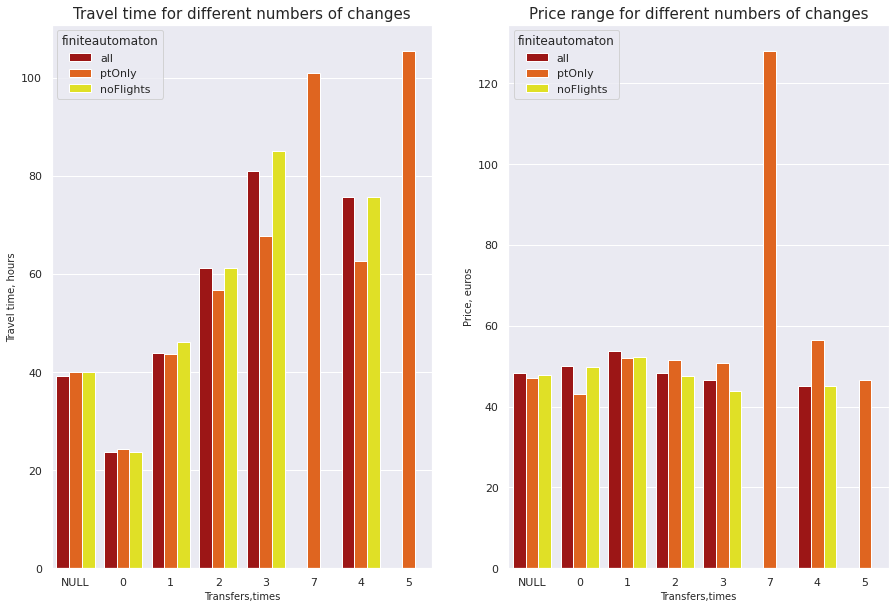

In [ ]:
def plot_data(data):
  fig, axes = plt.subplots(1, 2, figsize=(15, 10))
  #plot the differences within the tranfers with fixed values per mode type, 5 and 7 changes are relevant for public transport only-the time is the highest
  #direct transportation correspond equally to all mode types, normally happening within 1 day (<24 hours)
  #having 4 transfers you save your travel time than having 3 transfers
  plt.subplot(121)
  
  sns.barplot(x=data.define_value_numberOfChanges,y=data.totaltraveltimeinsec,hue="finiteautomaton",palette="hot",data=datanew,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Transfers,times", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Travel time, hours", size = 10)
  plt.title("Travel time for different numbers of changes", size = 15)

  plt.subplot(122)
  #the highest price again is for 7 changes-more than 2 times higher
  #normally the price is below 60 euros for all except 7 changes
  #having 1 transfer price is slightly higher than having direct transportation
  sns.barplot(x=data.define_value_numberOfChanges,y=data.totalprice,hue="finiteautomaton",palette="hot",data=datanew,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Transfers,times", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Price, euros", size = 10)
  plt.title("Price range for different numbers of changes", size = 15)

#considering the NULL value, we cant detect any outstanding result, there could be any number of transfers included, we do not assume that high frequency of changes is included
#the price is not higher in general when having 1 transfer


plot_data(datanew)

In [ ]:
#for the walking distance
wd=datanew.copy()
wd

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
1,1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
2,2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
3,3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
4,4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,138218,51.67,91.20,1,0.000,6.83,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,6.83
85149,138219,61.33,86.04,1,0.000,15.33,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,15.33
85150,138235,45.39,22.47,1,0.177,2.54,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
85151,138242,45.39,22.47,1,0.177,2.54,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54


In [ ]:
#to get rid of unknown observations
def reduce_null(data):
  data.drop(data.loc[data['define_value_walkingDistance']== 'NULL'].index, inplace=True)
  #data.drop(data.loc[data['define_value_waitingTime']== 'NULL'].index, inplace=True)

  return data

reduce_null(wd)


,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
40,40,3.93,0.86,0,0.300,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,NULL
41,41,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,NULL
42,42,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,NULL
43,43,3.93,0.86,0,0.300,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,NULL
44,44,2.53,3.83,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[car],Essen,Gelsenkirchen,0,0,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,138218,51.67,91.20,1,0.000,6.83,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,6.83
85149,138219,61.33,86.04,1,0.000,15.33,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,15.33
85150,138235,45.39,22.47,1,0.177,2.54,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
85151,138242,45.39,22.47,1,0.177,2.54,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54


In [ ]:
#for waiting time
wt=datanew.copy()
wt

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
1,1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
2,2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
3,3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
4,4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,138218,51.67,91.20,1,0.000,6.83,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,6.83
85149,138219,61.33,86.04,1,0.000,15.33,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,15.33
85150,138235,45.39,22.47,1,0.177,2.54,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
85151,138242,45.39,22.47,1,0.177,2.54,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54


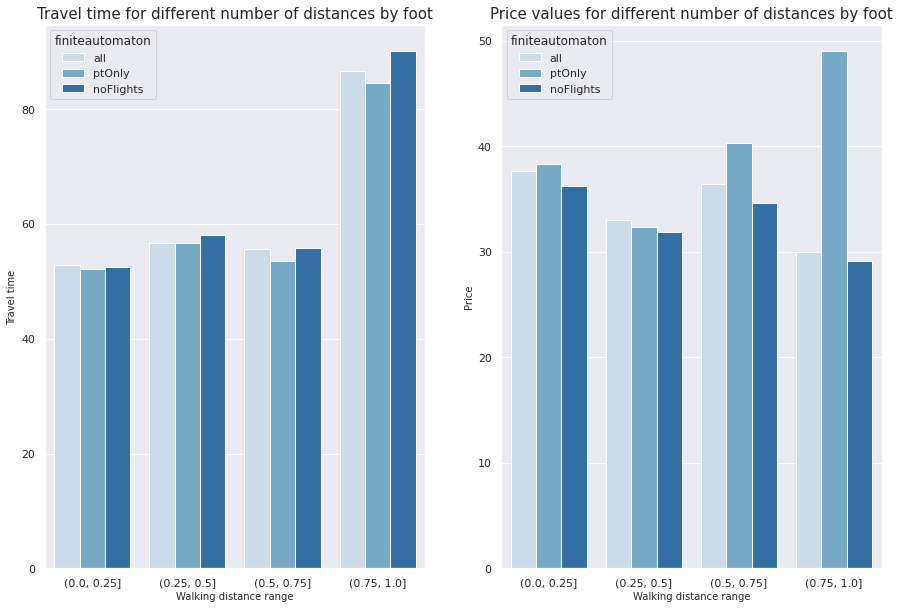

In [ ]:
def plot_d(data):
  #the highest walking distance corresponds to the highest travel time, normally mode of noFlights increases travel time and walking distance
  #distance between 0,2-0,5 matches with the higher travel time than distance by foot from 0,5 to 0,7
  fig, axes = plt.subplots(1, 2, figsize=(15, 10))
  
  plt.subplot(121)
  data['bin'] = pd.cut(data['define_value_walkingDistance'], bins = [0,0.25,0.5,0.75,1])
                       
  sns.barplot(x=data['bin'],y=data.totaltraveltimeinsec,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  #x=data.define_value_walkingDistance
  plt.xlabel("Walking distance range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Travel time", size = 10)
  plt.title("Travel time for different number of distances by foot", size = 15)

#the highest price is for use of PT having the walking distance from 0,75 to 1, -anomaly?
#other modes as all and noflights within this range are lower in prices with the longest distance to overcome by foot
  plt.subplot(122)
  data['bin'] = pd.cut(data['define_value_walkingDistance'], bins = [0,0.25,0.5,0.75,1])
  sns.barplot(x=data['bin'],y=data.totalprice,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Walking distance range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Price", size = 10)
  plt.title("Price values for different number of distances by foot", size = 15)


plot_d(wd)


In [ ]:
#exclude null data to proceed with binning for the waiting time 
def reduce_nul(data):
  #data.drop(data.loc[data['define_value_walkingDistance']== 'NULL'].index, inplace=True)
  data.drop(data.loc[data['define_value_waitingTime']== 'NULL'].index, inplace=True)

  return data

reduce_nul(wt)


,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
77,77,3.93,0.86,0,0.300,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,0
78,78,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,0
79,79,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,0
80,80,3.93,0.86,0,0.300,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,0
81,81,2.53,3.83,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[car],Essen,Gelsenkirchen,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,138218,51.67,91.20,1,0.000,6.83,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,6.83
85149,138219,61.33,86.04,1,0.000,15.33,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,15.33
85150,138235,45.39,22.47,1,0.177,2.54,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
85151,138242,45.39,22.47,1,0.177,2.54,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54


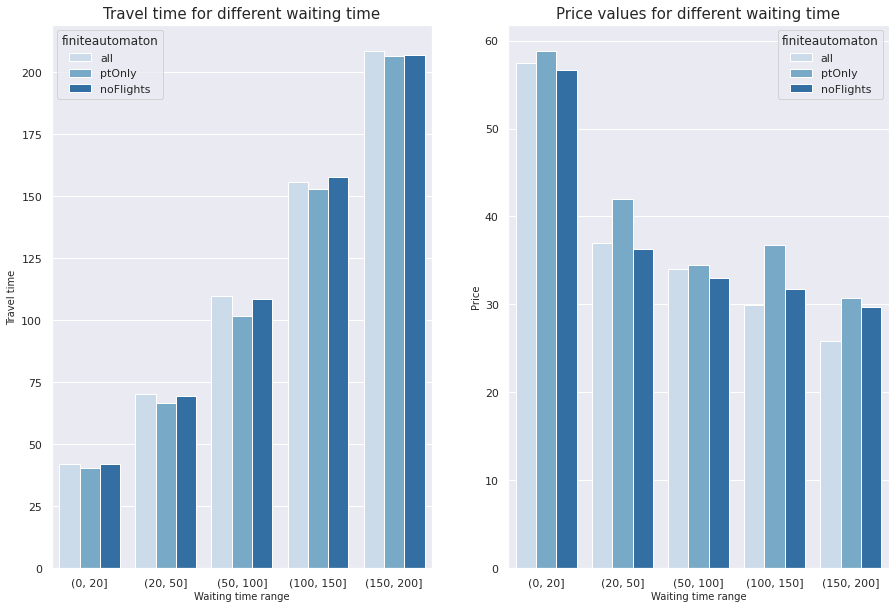

In [ ]:
def plot(data):
  #the more waiting time we have- the more travel time would it be for the trip
  #all transport are the leads from the mode perspective
  fig, axes = plt.subplots(1, 2, figsize=(15, 10))
  #on average, price would be within the same ratio
  plt.subplot(121)
  data['bin'] = pd.cut(data['define_value_waitingTime'], bins = [0,20,50,100,150,200])
                       #range(0,1,0.5), labels=[f'{l}-{l+0.5}' for l in range(0,0.5,0.5)])
  sns.barplot(x=data['bin'],y=data.totaltraveltimeinsec,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  #x=data.define_value_walkingDistance
  plt.xlabel("Waiting time range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Travel time", size = 10)
  plt.title("Travel time for different waiting time", size = 15)

  #if we do not want to wait a lot-the price would be significantly higher
  #its easy to follow the pattern-more time to wait-less money to pay
  #especially with the public transport
  plt.subplot(122)
  data['bin'] = pd.cut(data['define_value_waitingTime'], bins = [0,20,50,100,150,200])
  sns.barplot(x=data['bin'],y=data.totalprice,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Waiting time range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Price", size = 10)
  plt.title("Price values for different waiting time", size = 15)




plot(wt)

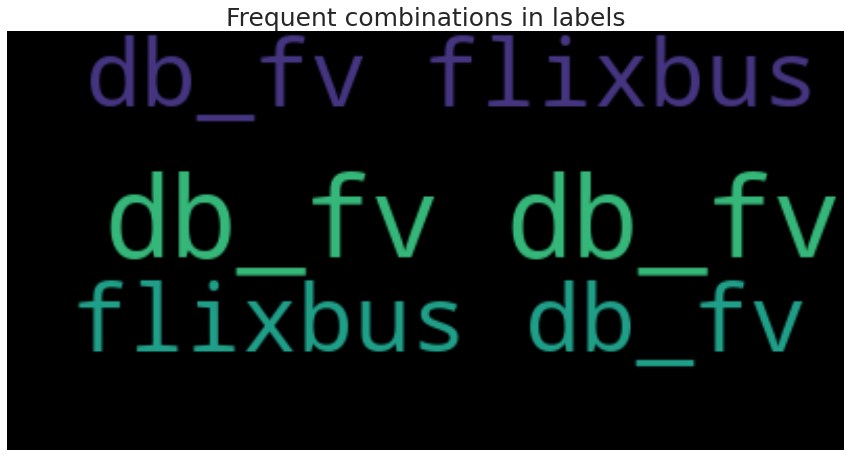

In [ ]:
#for the sake of exploratory analysis have an idea to explore frequency of the proposed solutions
from wordcloud import WordCloud
#join each element of the column name in our dataset
txt =" ".join(str(each) for each in df4.finalsolutionusedlabels)
# create and generate a word cloud image, set a max range of words-top 2
name_wordcloud = WordCloud(max_words=3, background_color="black").generate(txt)
plt.figure(figsize=(15,10))
#display the generated image:
#nn bilinear interpolation, a linear interpolation is first performed between pixels in the horizontal (X) direction of the image and then in the Y direction (or vice-versa)
plt.imshow(name_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Frequent combinations in labels',size = 25) #set the figure size
plt.show()
#draw a conclusion about the frequency 
#as we can see, the most proposed mode of travel is land-based and includes flixbus or rail transportation

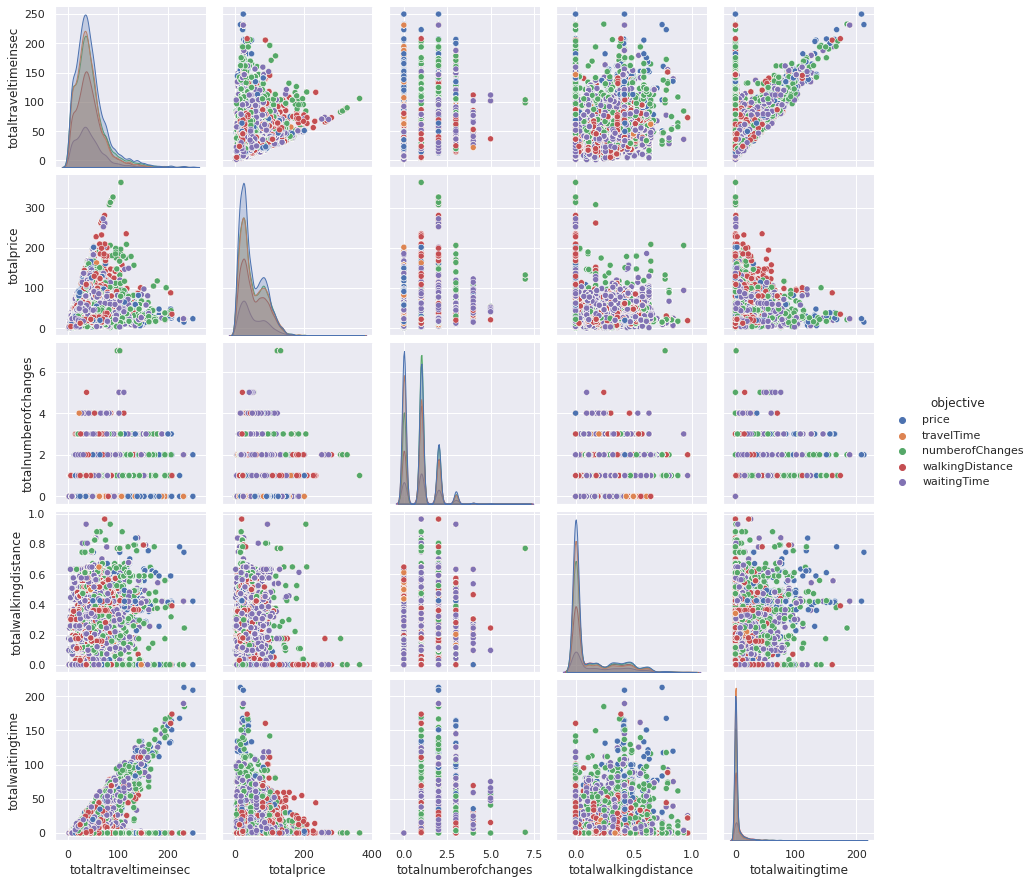

In [ ]:
#get the pairplot to understand the a relationship between two variables 
#determine the color for different mode choices in general

df4 = df4.reset_index(drop=True)
sns.pairplot(df4,vars=['totaltraveltimeinsec','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime'],hue='objective')

# could highlight strong positive correlation between waiting and total time, could evaluate how our objective works

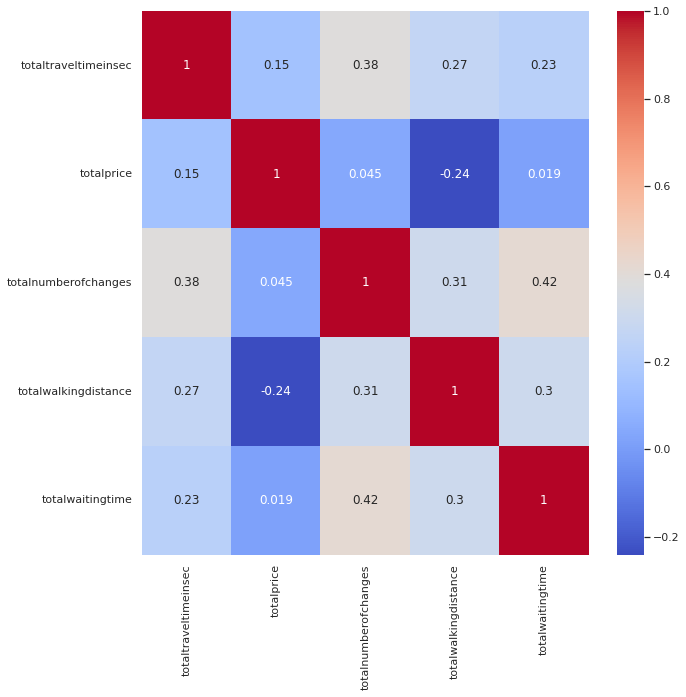

In [ ]:
#build the correlation matrix for total price and other numerical columns to see how high the correlation would be

selected = df4[['totaltraveltimeinsec','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime']] #pick the columns
show=selected.corr(method='kendall') #compute pairwise correlation
plt.figure(figsize=(10,10))
sns.heatmap(show,annot=True,cmap='coolwarm')

# reference:https://www.statisticssolutions.com/pearsons-correlation-coefficient/
# meaning of correlation number
# Perfect: If the value is near ± 1, then it said to be a perfect correlation
# High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
# Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
# Low degree: When the value lies below ± 0.29, then it is said to be a small correlation.
# No correlation: When the value is zero.

#conclusion for this part: strong moderate correlation for transfers and waiting time=> more changes more time to wait, travel time in total and transfers, 
#low degree of correlation for price and travel time!!,
#negative correlation (still small) between walking distance and price, if the price is higher-distance to cover by foot is lower

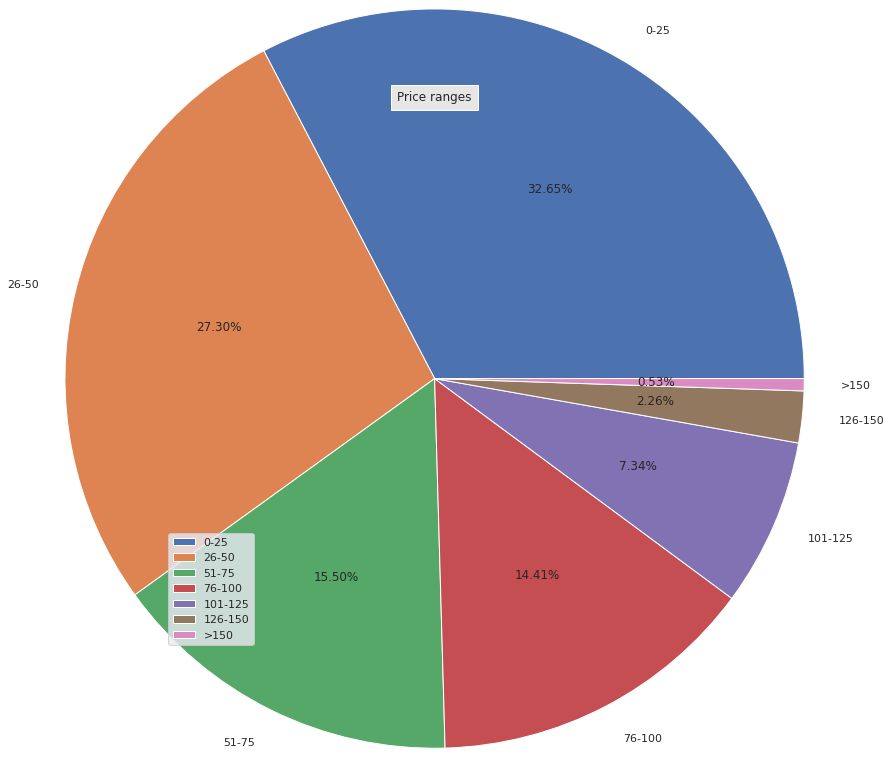

49.75690815355889

In [ ]:
#briefly investigate other plots (differences for 3 dim) before the final merging

#price binning for 3 dim
data_price4 = df4[:] #slice for every element
data_price4["totalprice"] = data_price4["totalprice"].astype(int) #specify the column and dtype we need
bins = [0,25,50,75,100,125,150,200] #create a list of bins
labels = ['0-25','26-50','51-75','76-100','101-125', '126-150', '>150'] #create the list of labels
data_price4['totalprice_cat'] = pd.cut(data_price4["totalprice"], bins=bins, labels=labels) #bin values into discrete intervals
data_price4.head()
plt.figure(figsize=(10,10)) 

#count and enter percentages inside the shape
plt.pie(data_price4['totalprice_cat'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.7)#parametres
plt.legend(loc="lower left") #location of the figure
plt.title("Price ranges", bbox={'facecolor':'0.9', 'pad':6}, loc = "center")#play with the title
plt.show()


#on average the price would be 49,75 euros
data_price4["totalprice"].mean()

#the most common range for price in dataset3 is also below 25 euros

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


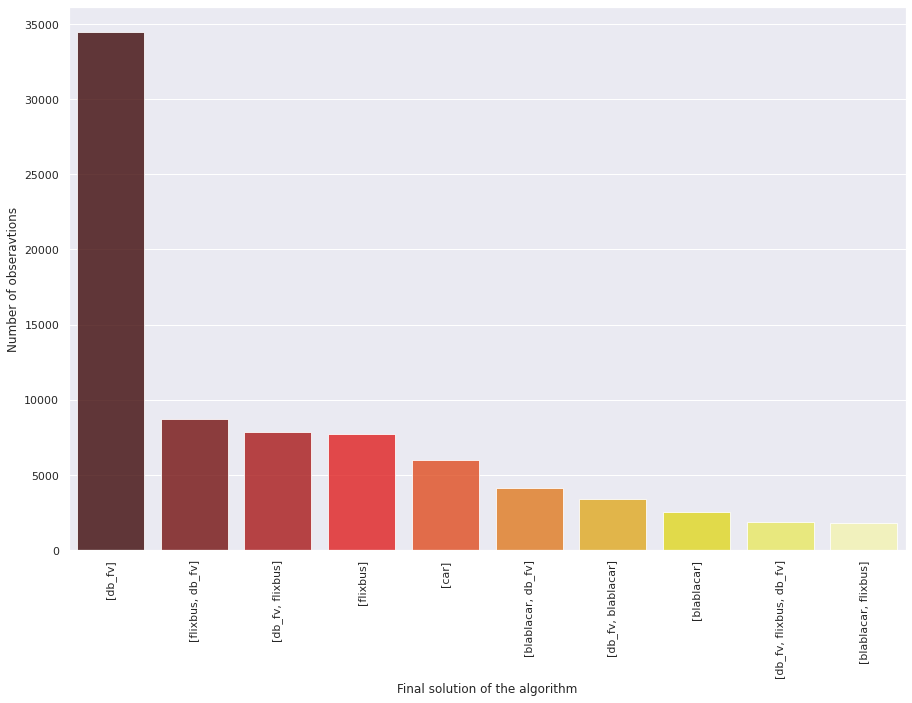

In [ ]:
# Plot Top 10 combinations based on number of observations
# the lead combination is the same as in 2dim, the second one proposed option is different in comparison to 2dim dataset
# the most common one (suitable for many routes)- train
cnt_srs = df4['finalsolutionusedlabels'].value_counts().nlargest(10)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Final solution of the algorithm', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


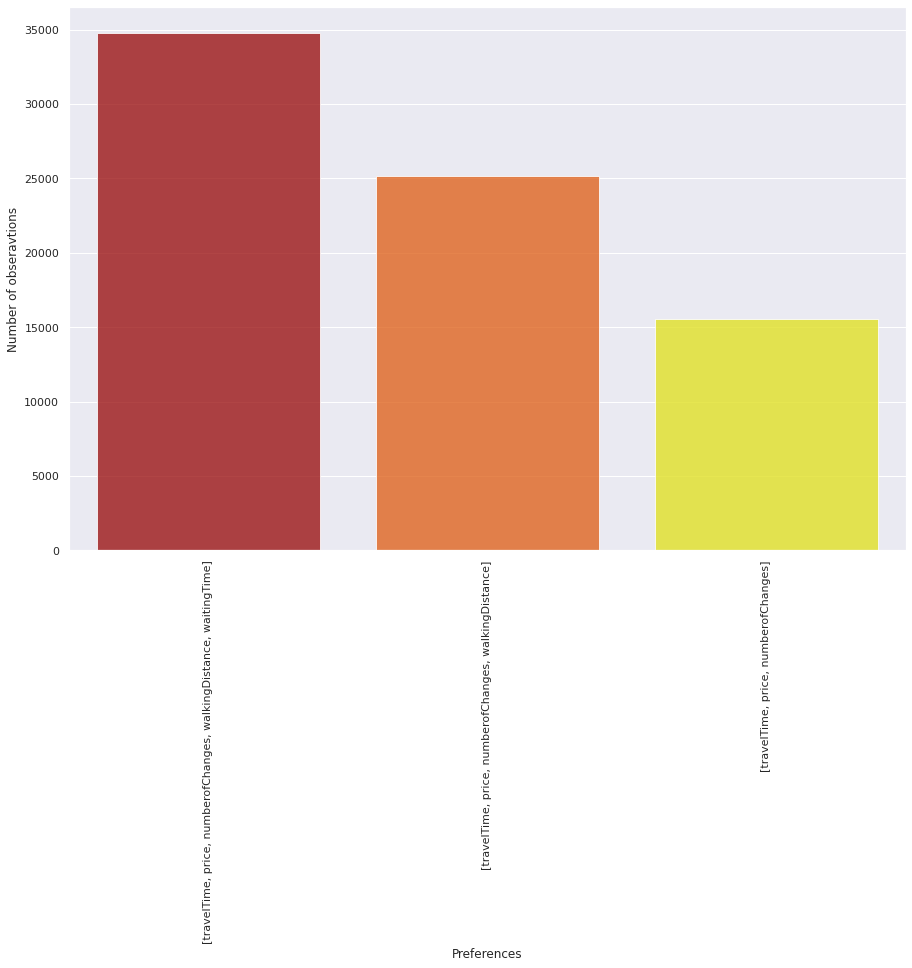

In [ ]:
# Plot Top 3 combinations based on number of preferences
# the lead combination is having al preferences inside- 35000 observation, having only price and time the less common one

cnt_srs = df4['consideredpreferences'].value_counts().nlargest(3)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Preferences', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

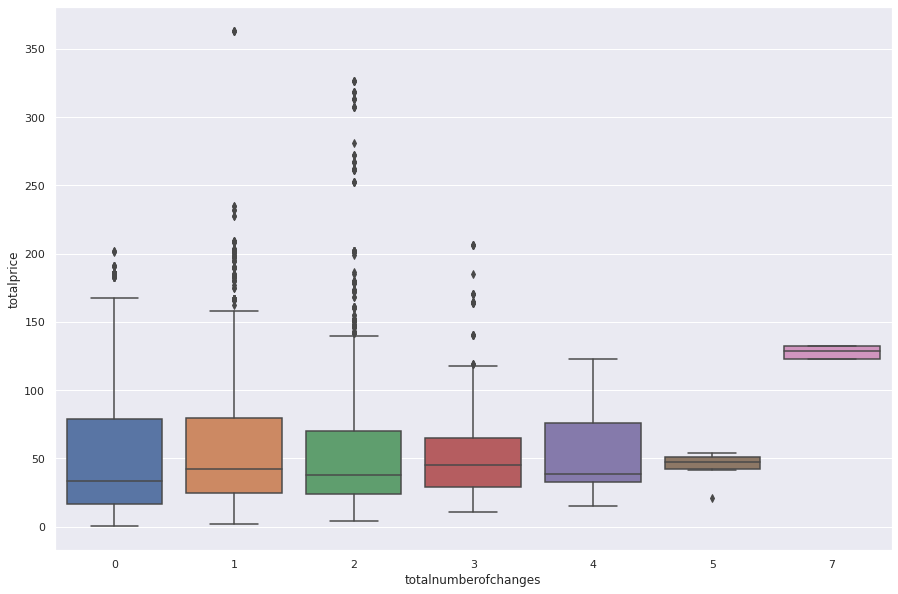

In [ ]:
#number of transfers per price
#check the outliers with the dots
#price for 0 transfers (null or 0) is slightly greater than for 1 and 2 in general
#mostly distributed between 0 and 165 euros, the prices which are higher 165 we could consider them as the outliers
# 8 deffirenet options including 0 as null

plt.figure(figsize=(15,10))
sns.boxplot(x='totalnumberofchanges',y='totalprice',data=df4.sort_values('totalprice',ascending=False))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


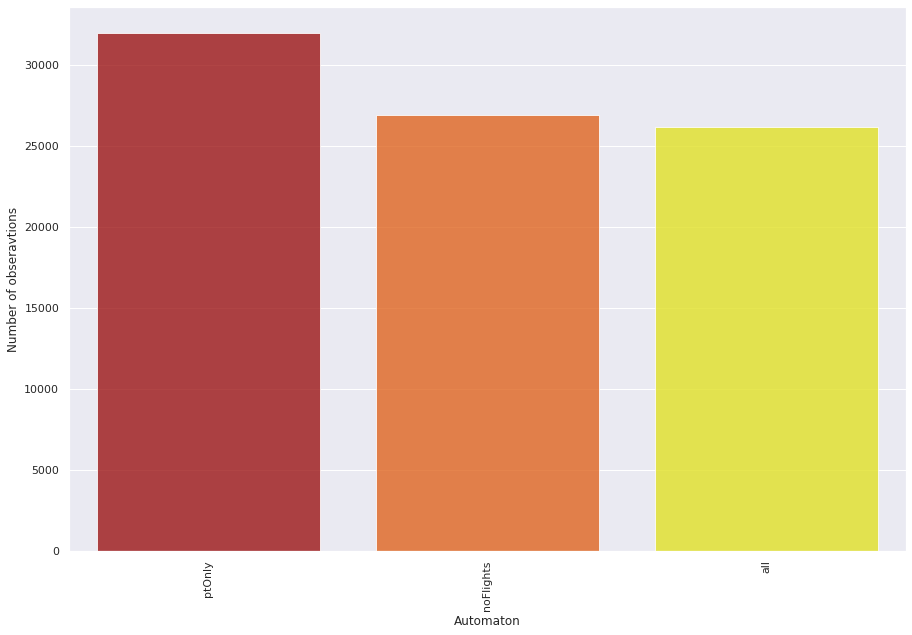

In [ ]:
# Plot Top 3 combinations based on finiteautomaton
# public transport only mode is involved at most for almost 33 000 observations of full dataset
cnt_srs = df4['finiteautomaton'].value_counts().nlargest(3)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Automaton', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Distribution of prices per number of changes ')

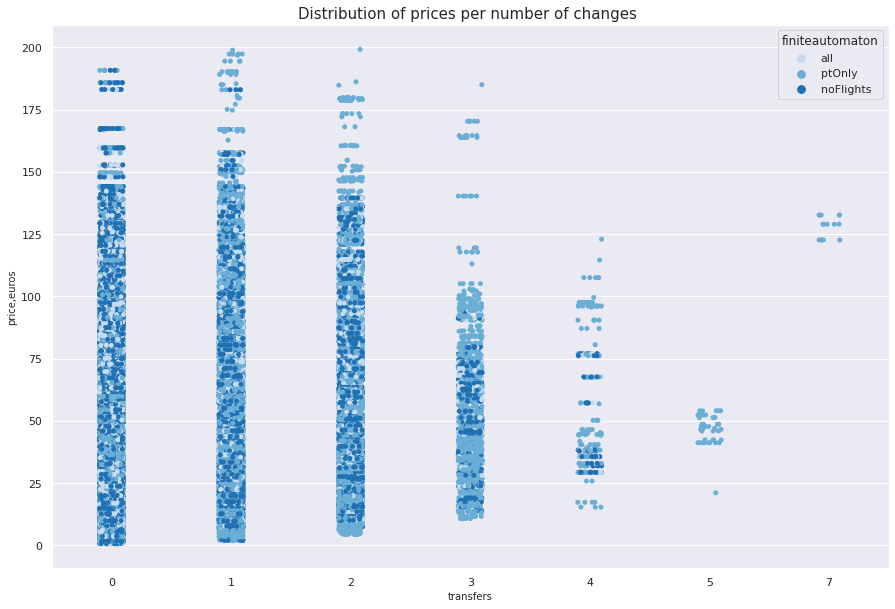

In [ ]:
#investigate deeper in the transfer distribution when the price is less than 200 euros
#for the combined dataset

plt.figure(figsize=(15, 10))
sns.stripplot(data=df4,x=df4.totalnumberofchanges[df4['totalprice']<200]#set an interval
              ,y='totalprice', hue="finiteautomaton",palette='Blues') #configure the axis
plt.xlabel("transfers", size = 10)
plt.ylabel("price,euros", size = 10)
plt.title('Distribution of prices per number of changes ',fontsize=15)

#found out that the price is slightly higher having 1 transfer than 0 (includes 0 and null),2 and 3, but all of them are higher than having  4,5 and 7
# for 0 transfer the mode of noFlights is dominative one, especially when the price is high, for 1-7 transfers higher price relates to public transport choice mostly

In [ ]:
#evaluated correlation between 2 categorical variables
#Cramers V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive)
# based on Pearson's chi-squared statistic 
# no direct association between finite automation and considered preferences
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(df4.finiteautomaton,df4.consideredpreferences)


0.0409578917501821

In [ ]:
#no direct association
cramers_v(df4.finiteautomaton,df4.finalsolutionusedlabels)


0.15629295264861107

In [ ]:
#the association is low
# would drop the column objective for clustering
cramers_v(df4.objective,df4.finalsolutionusedlabels)

0.05709085075041991

In [ ]:
cramers_v(df4.consideredpreferences,df4.finalsolutionusedlabels)

0.07897990963843367

In [ ]:
cramers_v(df4.sourcename,df4.finalsolutionusedlabels)

0.1802066058739973

In [ ]:
cramers_v(df4.targetname,df4.finalsolutionusedlabels)

0.16994806029121146